In [9]:
import keras
keras.__version__

'2.4.3'

In [10]:
import os, shutil, glob

In [11]:
# The directory where the datasets are stored
base = 'datasets'

#base_dir = os.path.join(base, 'real')
base_dir = os.path.join(base, 'synthetic')
#os.mkdir(base_dir)


# Directories for our training,
# validation and test splits. 
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# Directory with our training cigarettes pictures
train_cigarettes_dir = os.path.join(train_dir, 'cigarettes')
#os.mkdir(train_cigarettes_dir)

# Directory with our training not_cigarettes pictures
train_not_cigarettes_dir = os.path.join(train_dir, 'not_cigarettes')
#os.mkdir(train_not_cigarettes_dir)

# Directory with our validation cigarettes pictures
validation_cigarettes_dir = os.path.join(validation_dir, 'cigarettes')
#os.mkdir(validation_cigarettes_dir)

# Directory with our validation not_cigarettes pictures
validation_not_cigarettes_dir = os.path.join(validation_dir, 'not_cigarettes')
#os.mkdir(validation_not_cigarettes_dir)

# Directory with our test cigarettes pictures
test_cigarettes_dir = os.path.join(test_dir, 'cigarettes')
#os.mkdir(validation_cigarettes_dir)

# Directory with our test not_cigarettes pictures
test_not_cigarettes_dir = os.path.join(test_dir, 'not_cigarettes')
#os.mkdir(test_not_cigarettes_dir)

In [12]:
print('total training images:', len(os.listdir(train_cigarettes_dir) + os.listdir(train_not_cigarettes_dir)))

total training images: 2560


In [13]:
print('total validation images:', len(os.listdir(validation_cigarettes_dir) + os.listdir(validation_not_cigarettes_dir)))

total validation images: 640


In [14]:
print('total test images:', len(os.listdir(test_cigarettes_dir) + os.listdir(test_not_cigarettes_dir)))

total test images: 400


In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) #1000, 800, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


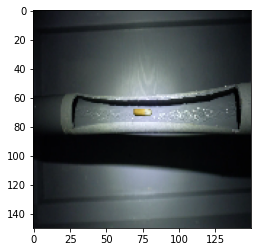

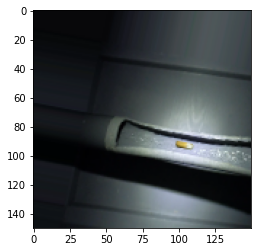

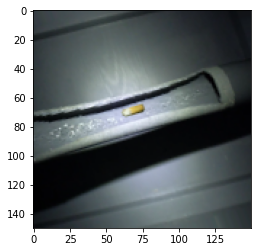

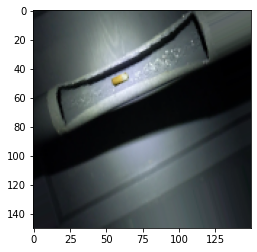

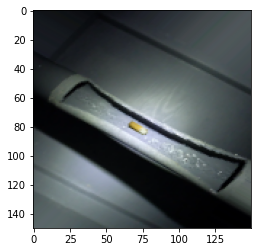

In [18]:

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
# All images will be rescaled by 1./255
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Code to display what data augmentation does.
fnames = [os.path.join(train_cigarettes_dir, fname) for
fname in os.listdir(train_cigarettes_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
plt.imshow(img)
plt.show()
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


In [19]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [20]:
history = model.fit(train_generator, epochs = 10, validation_data=validation_generator, steps_per_epoch = 128, validation_steps = 32)

#model.save('MODEL_NAME.h5')

Epoch 1/10
128/128 [==============================] - 78s 579ms/step - loss: 0.4023 - acc: 0.7641 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 2/10
128/128 [==============================] - 68s 535ms/step - loss: 0.0250 - acc: 0.9928 - val_loss: 2.0804e-04 - val_acc: 1.0000
Epoch 3/10
128/128 [==============================] - 69s 538ms/step - loss: 0.0105 - acc: 0.9964 - val_loss: 2.1020e-04 - val_acc: 1.0000
Epoch 4/10
128/128 [==============================] - 69s 538ms/step - loss: 0.0052 - acc: 0.9980 - val_loss: 2.4929e-05 - val_acc: 1.0000
Epoch 5/10
128/128 [==============================] - 69s 538ms/step - loss: 9.3618e-05 - acc: 1.0000 - val_loss: 7.8070e-07 - val_acc: 1.0000
Epoch 6/10
128/128 [==============================] - 69s 540ms/step - loss: 0.0200 - acc: 0.9934 - val_loss: 9.3606e-07 - val_acc: 1.0000
Epoch 7/10
128/128 [==============================] - 68s 534ms/step - loss: 0.0043 - acc: 0.9986 - val_loss: 1.6486e-06 - val_acc: 1.0000
Epoch 8/10
128/128 [=======

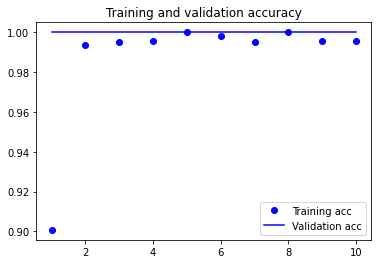

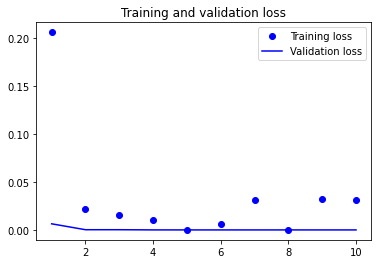

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig('plot')

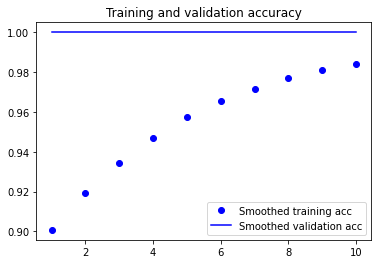

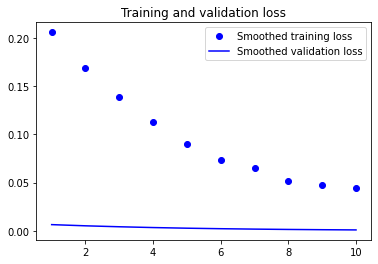

In [22]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_datagen2 = ImageDataGenerator(rescale=1./255)

test_generator2 = test_datagen2.flow_from_directory(
        #os.path.join(base, 'ORO/sanity_dir'),
        test_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary',
        shuffle=False)

test_loss, test_acc = model.evaluate(test_generator2)
print('test acc:', test_acc)

probabilities = model.predict(test_generator2)

#print(probabilities)
from sklearn.metrics import confusion_matrix
import numpy as np
y_true = np.array([0] * 200 + [1] * 200)
y_pred = probabilities > 0.5

confusion_matrix(y_true, y_pred)

Found 400 images belonging to 2 classes.
8/8 [==============================] - 3s 316ms/step - loss: 4.6065e-07 - acc: 1.0000
test acc: 1.0


array([[200,   0],
       [  0, 200]], dtype=int64)